
<div style="background-color: #FFD700; color: #333333; padding: 10px;">

# **Human Resources Analysis Predict Attrition**

</div>

<div style="background-color: #f0f0f0; color: #000000; padding: 10px;">
  <strong>Project Contributors</strong>
  <ul>
    <li>Gonçalo Alves</li>
    <li>Gonçalo Eloy</li>
    <li>Maria Beatriz Amado</li>
    <li>Mariana Pereira</li>
  </ul>
</div>

<div style="background-color: #3399CC; color: white; padding: 10px;">
<a id='scrub'>
<h3 style="color: white;"><strong>Introduction</strong></h3>
</a>
</div>

This project aims to predict employee attrition within a specific company's workforce. 

As data scientists, our goal is to create a model that estimates the likelihood of an employee staying or quitting based on their characteristics. 

Despite the complexity and incomplete data, our model will assist the HR team in taking preventive measures to reduce attrition, such as adjusting salaries, promoting engaging projects, and offering remote work options. This project provides a valuable opportunity to explore feature extraction from diverse data sources and addresses key questions for a multinational consultancy firm regarding employee retention. 

Our main objectives encompass descriptive analytics to uncover correlations and predictive analytics to build classification models for attrition prediction.


In [5]:
#pip install --upgrade pip
#pip install pandas
#pip install matplotlib
#pip install seaborn

<a id='toc'></a>

### Table of Contents
* [1. Obtain Data](#obtain) <br>
    * [1.1 Load libraries](#lib)<br>
    * [1.2. Import data](#import)<br>
    * [1.3. Dimensionality of the dataframe](#dim)<br>
    * [1.4. Check missing values](#miss)<br>

* [2. Scrub data](#scrub) <br>
    * [2.1. Information about columns](#info) <br>
    * [2.2. Checking duplicate values](#duplicates)<br>
    * [2.3. Missing values](#var)<br>
        * [2.3.1. Categorical Variables](#cat)<br>
        * [2.3.2. Numerical Variables](#num)<br>
    * [2.4. Data Cleaning: Outliers](#out)<br> 

* [3. Explore data](#explore) <br>
        * [3.1. Basic Exploration](#exp)<br>
        * [3.2. Data Visualization](#vis)<br>
        * [3.3. Statistical Exploration](#stat)<br>


* [4. Model](#model) <br>
* [5. Interpret](#int) <br>





<div style="background-color: #3399CC; color: white; padding: 10px;">
<a id='scrub'>
<h3 style="color: white;"><strong>1. Obtain Data</strong></h3>
</a>
</div>

**__`1.1`__ Load Libraries**

<a id='lib'></a>


In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

**__`1.2`__ Import data**

<a id='import'></a>

In [7]:
data= pd.read_csv("https://raw.githubusercontent.com/beatrizamado/HR-Analysis/main/HR_DS.csv")
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


**__`1.3`__ Dimensionality of the dataframe**

<a id='dim'></a>

In [8]:
data.shape

(1470, 35)

In [9]:
data['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

O dataset é unbalanced. Significa que vamos ter de fazer um resampling/ k-fold stratified cross validation e afins

**__`1.4`__ Checking missing values**

<a id='miss'></a>

In [10]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

    
<div class="alert alert-block alert-success">
<a id='scrub'>
<font color = '#006400'> 
    
### 2. Describe data </font>
</a>    

**__`2.1`__ Information about columns**

<a id='info'></a>

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


**__`2.2`__ Checking duplicates**

<a id='duplicates'></a>

In [13]:
duplicates=data[data.duplicated()] # save all duplicate rows
print("There are {} duplicates.".format(list(data.duplicated()).count(True)))
data.drop_duplicates(inplace = True) #remove duplicates

data.reset_index(inplace=True)
data.drop("index", inplace=True, axis=1)
print("\n")
print("All the duplicates were saved in a dataframe named:'Duplicates'")

There are 0 duplicates.


All the duplicates were saved in a dataframe named:'Duplicates'


**__`2.3`__ Missing values**

<a id='var'></a>

In [14]:
categoricalVar = data.select_dtypes(include=['object']).columns.tolist()
numericalVar= data.select_dtypes(exclude=['object']).columns.tolist()

print("\nThe numerical variables are: \n{}.".format((numericalVar)))
print("\nThe non-numerical variables are:\n{}.".format(categoricalVar))

print("\nIn summary:")
pd.DataFrame(([categoricalVar, numericalVar]),index = ['Categorical Variables', 'Numerical Variables']).T


The numerical variables are: 
['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'].

The non-numerical variables are:
['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime'].

In summary:


,Categorical Variables,Numerical Variables
0,Attrition,Age
1,BusinessTravel,DailyRate
2,Department,DistanceFromHome
3,EducationField,Education
4,Gender,EmployeeCount
5,JobRole,EmployeeNumber
6,MaritalStatus,EnvironmentSatisfaction
7,Over18,HourlyRate
8,OverTime,JobInvolvement
9,None,JobLevel


**__`2.3.1.`__ Categorical Variables**

<a id='cat'></a>

In [15]:
pd.DataFrame(data[categoricalVar]).describe()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


* **Attrition**

In [16]:
null_count = data["Attrition"].isnull().sum()
print("There are {} nulls.".format(null_count))
print("\n")
unique_values = data["Attrition"].unique()
print("The unique values in the Attrition are: {}.".format(unique_values))
print("\n")

There are 0 nulls.


The unique values in the Attrition are: ['Yes' 'No'].




* **Business Travel**

In [17]:
null_count = data["BusinessTravel"].isnull().sum()
print("There are {} nulls.".format(null_count))
print("\n")
unique_values = data["BusinessTravel"].unique()
print("The unique values in the Business Travel are: {}.".format(unique_values))
print("\n")

There are 0 nulls.


The unique values in the Business Travel are: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel'].




* **Department**


In [18]:
null_count = data["Department"].isnull().sum()
print("There are {} nulls.".format(null_count))
print("\n")
unique_values = data["Department"].unique()
print("The unique values in the Department are: {}.".format(unique_values))
print("\n")

There are 0 nulls.


The unique values in the Department are: ['Sales' 'Research & Development' 'Human Resources'].




* **Education Field**

In [19]:
null_count = data["EducationField"].isnull().sum()
print("There are {} nulls.".format(null_count))
print("\n")
unique_values = data["EducationField"].unique()
print("The unique values in the Education Field are: {}.".format(unique_values))
print("\n")

There are 0 nulls.


The unique values in the Education Field are: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources'].




* **Gender**

In [20]:
null_count = data["Gender"].isnull().sum()
print("There are {} nulls.".format(null_count))
print("\n")
unique_values = data["Gender"].unique()
print("The unique values in the Gender are: {}.".format(unique_values))
print("\n")

There are 0 nulls.


The unique values in the Gender are: ['Female' 'Male'].




* **Job Role**

In [21]:
null_count = data["JobRole"].isnull().sum()
print("There are {} nulls.".format(null_count))
print("\n")
unique_values = data["JobRole"].unique()
print("The unique values in the Job Role are: {}.".format(unique_values))
print("\n")

There are 0 nulls.


The unique values in the Job Role are: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources'].




* **Marital Status**

In [22]:
null_count = data["MaritalStatus"].isnull().sum()
print("There are {} nulls.".format(null_count))
print("\n")
unique_values = data["MaritalStatus"].unique()
print("The unique values in the Marital Status are: {}.".format(unique_values))
print("\n")

There are 0 nulls.


The unique values in the Marital Status are: ['Single' 'Married' 'Divorced'].




* **Over 18**

**DÚVIDA**: no enunciado diz "Yes" ou "No" e o resultado da função dá apenas "Yes"

In [23]:
null_count = data["Over18"].isnull().sum()
print("There are {} nulls.".format(null_count))
print("\n")
unique_values = data["Over18"].unique()
print("The unique values in the Over 18 are: {}.".format(unique_values))
print("\n")

There are 0 nulls.


The unique values in the Over 18 are: ['Y'].




In [24]:
over_18_column = data[['Over18']]

print(over_18_column)

     Over18
0         Y
1         Y
2         Y
3         Y
4         Y
...     ...
1465      Y
1466      Y
1467      Y
1468      Y
1469      Y

[1470 rows x 1 columns]


* **Overtime**

In [25]:
null_count = data["OverTime"].isnull().sum()
print("There are {} nulls.".format(null_count))
print("\n")
unique_values = data["OverTime"].unique()
print("The unique values in the Overtime : {}.".format(unique_values))
print("\n")

There are 0 nulls.


The unique values in the Overtime : ['Yes' 'No'].




**__`2.3.2.`__ Numerical Variables**

<a id='num'></a>


In [26]:
pd.DataFrame(data[numericalVar]).describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


* **Education**

### ***SUGESTAO - E SE TRANSFORMASSEMOS A VAR EDUCAÇÃO PARA CATEGORICA***
1 "basic"
2 "highschool"
etc

In [27]:
null_count = data["Education"].isnull().sum()
print("There are {} nulls.".format(null_count))
print("\n")
unique_values = data["Education"].unique()
print("The unique values in the Education are: {}.".format(unique_values))
print("\n")

There are 0 nulls.


The unique values in the Education are: [2 1 4 3 5].




* **Age**

In [28]:
null_count = data["Age"].isnull().sum()
print("There are {} nulls.".format(null_count))
print("\n")
unique_values = data["Age"].unique()
print("The unique values in the Age are: {}.".format(unique_values))
print("\n")

There are 0 nulls.


The unique values in the Age are: [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60].




* **Monthly Income**

In [29]:
null_count = data["MonthlyIncome"].isnull().sum()
print("There are {} nulls.".format(null_count))
print("\n")
unique_values = data["MonthlyIncome"].unique()
print("The unique values in the MonthlyIncome are: {}.".format(unique_values))
print("\n")

There are 0 nulls.


The unique values in the MonthlyIncome are: [5993 5130 2090 ... 9991 5390 4404].




**__`2.4`__ Data Cleaning: Outliers**

<a id='out'></a>

In [30]:
import numpy as np

In [31]:
MonthlyIncome=data['MonthlyIncome']

# Percentiles
p25 = np.percentile(MonthlyIncome, 25)
p75 = np.percentile(MonthlyIncome, 75)

# Interquartile range (IQR)
IQR = p75 - p25

# Inferior and superior limits of outlier detection
lim_inf = p25 - 1.5 * IQR
lim_sup = p75 + 1.5 * IQR

# Identifying outliers
outliers = data[(MonthlyIncome < lim_inf) | (MonthlyIncome > lim_sup)]

outliers.count()

Age                         114
Attrition                   114
BusinessTravel              114
DailyRate                   114
Department                  114
DistanceFromHome            114
Education                   114
EducationField              114
EmployeeCount               114
EmployeeNumber              114
EnvironmentSatisfaction     114
Gender                      114
HourlyRate                  114
JobInvolvement              114
JobLevel                    114
JobRole                     114
JobSatisfaction             114
MaritalStatus               114
MonthlyIncome               114
MonthlyRate                 114
NumCompaniesWorked          114
Over18                      114
OverTime                    114
PercentSalaryHike           114
PerformanceRating           114
RelationshipSatisfaction    114
StandardHours               114
StockOptionLevel            114
TotalWorkingYears           114
TrainingTimesLastYear       114
WorkLifeBalance             114
YearsAtC

**Save data to exclude the outliers**

In [32]:
data_bkp = data.copy()

**Exclude outliers from the dataframe** - **EXCLUÍMOS OUTLIERS??**

In [33]:

#data = data[~data['EmployeeNumber'].isin(outliers['EmployeeNumber'])].copy()

    
<div class="alert alert-block alert-success">
<a id='scrub'>
<font color = '#006400'> 
    
### 3. Explore Data </explore>
</a> 

**__`3.1.`__ Basic Exploration**

<a id='exp'></a>

In [34]:
print(data.describe())

               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335            

**__`3.2.`__ Data Visualization**

<a id='vis'></a>

**Boxplot chart: Age, Monthly Income and Attrition**

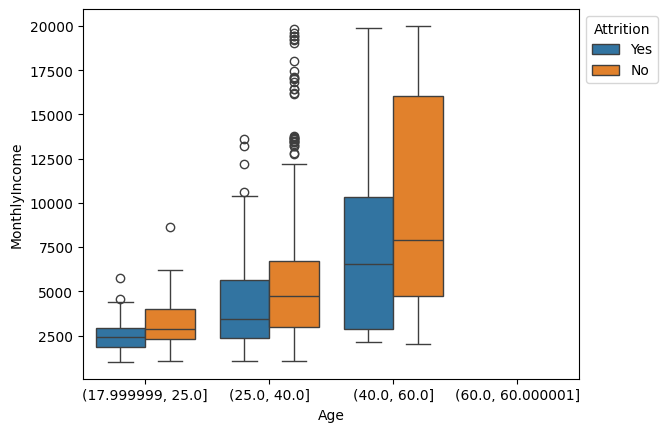

In [35]:
age_bins = [data["Age"].min() - 1e-6, 25, 40, 60, data["Age"].max() + 1e-6]
age_bins.sort()

BoxplotMarital = sns.boxplot(x=pd.cut(data['Age'], age_bins), y="MonthlyIncome", hue="Attrition", data=data)
sns.move_legend(BoxplotMarital, "upper left", bbox_to_anchor=(1, 1))

**__`3.3.`__ Statistical Exploration**

- Numerical Variables

<a id='exp'></stat>

In [36]:

numeric_data = data.select_dtypes(include=['number'])
skewness_kurtosis_df = pd.DataFrame({'Skewness': numeric_data.skew(), 'Kurtosis': numeric_data.kurt()})
skewness_kurtosis_df


,Skewness,Kurtosis
Age,0.413286,-0.404145
DailyRate,-0.003519,-1.203823
DistanceFromHome,0.958118,-0.224833
Education,-0.289681,-0.559115
EmployeeCount,0.000000,0.000000
EmployeeNumber,0.016574,-1.223179
EnvironmentSatisfaction,-0.321654,-1.202521
HourlyRate,-0.032311,-1.196398
JobInvolvement,-0.498419,0.270999
JobLevel,1.025401,0.399152


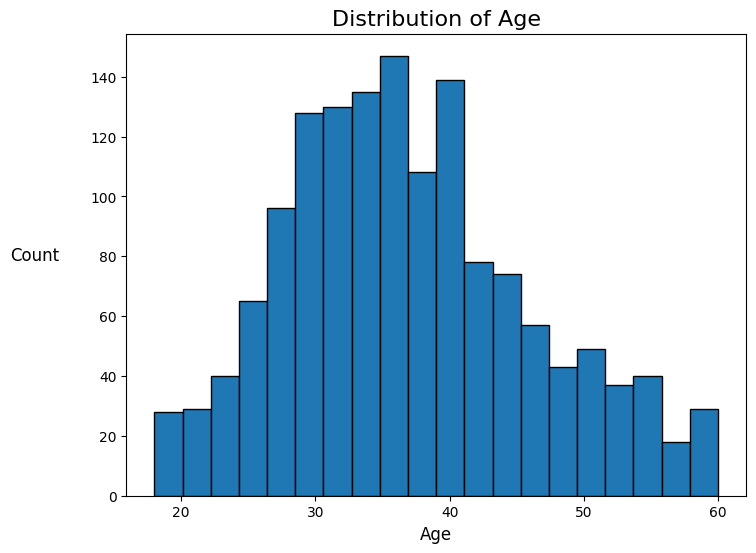

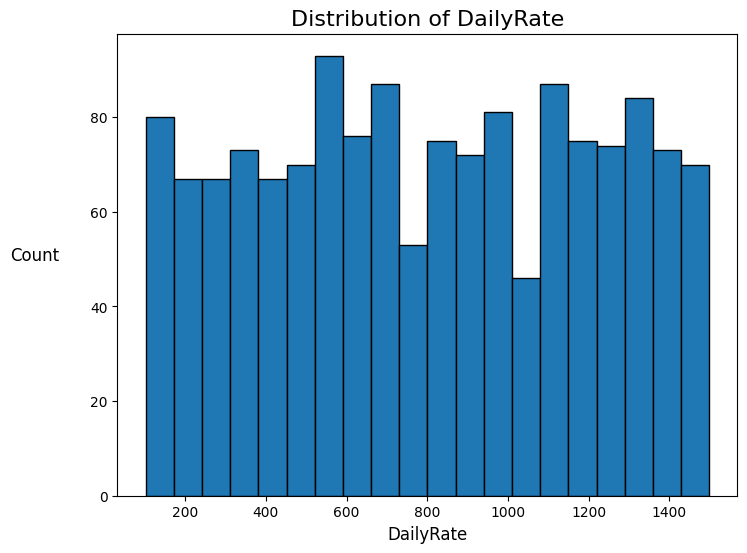

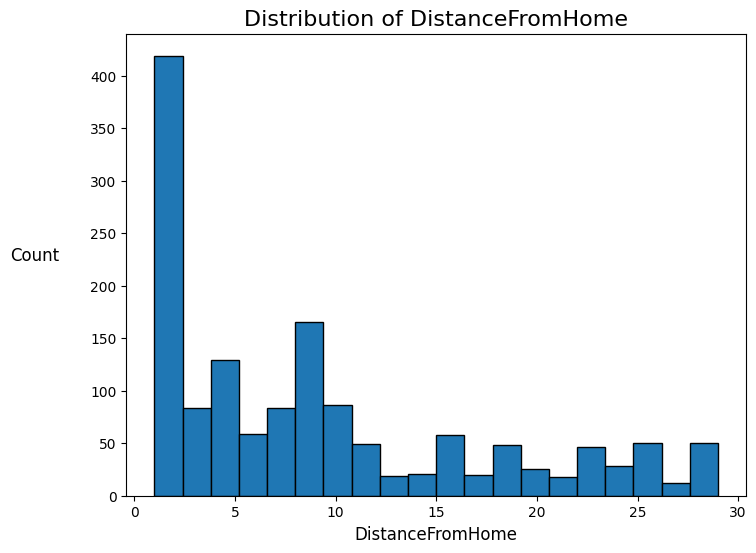

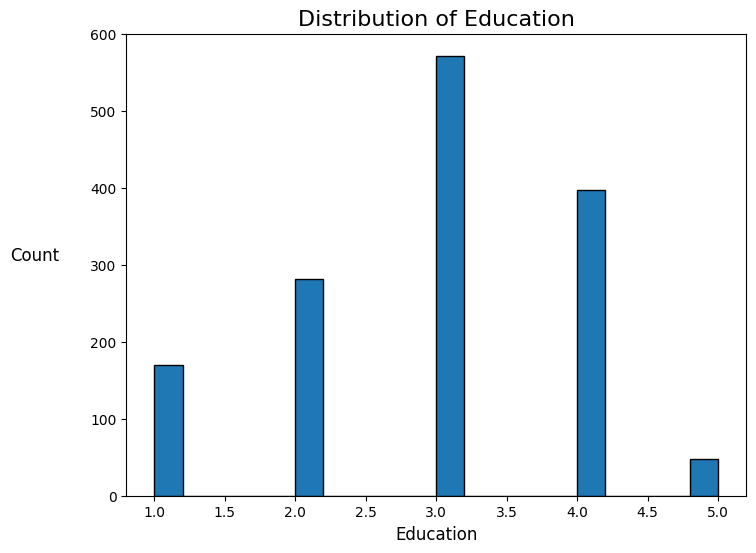

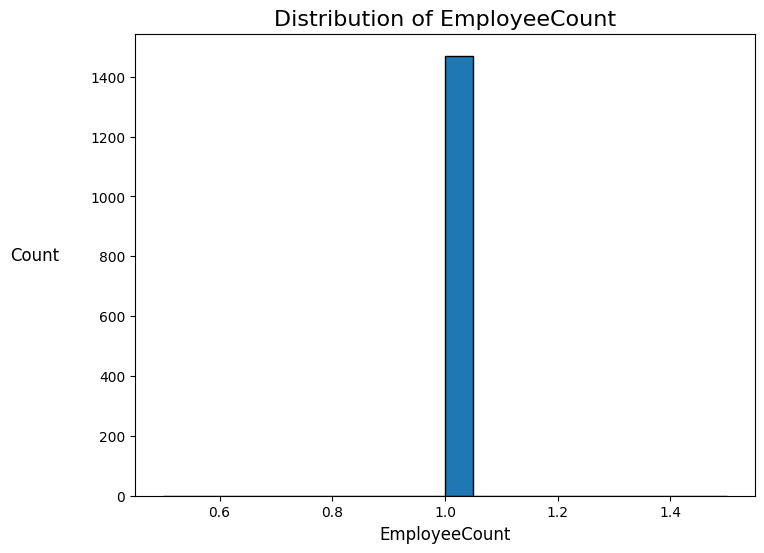

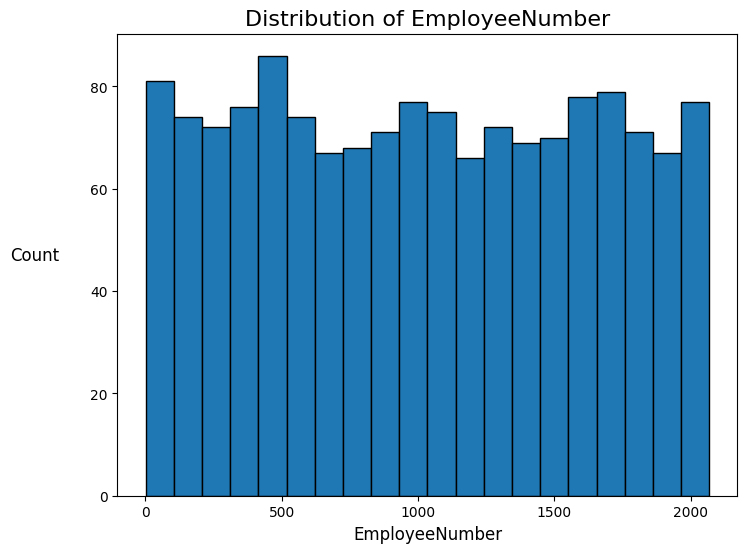

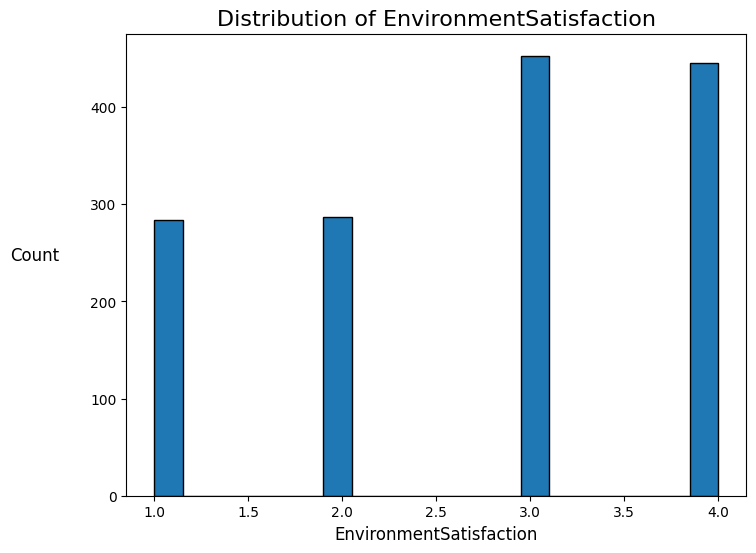

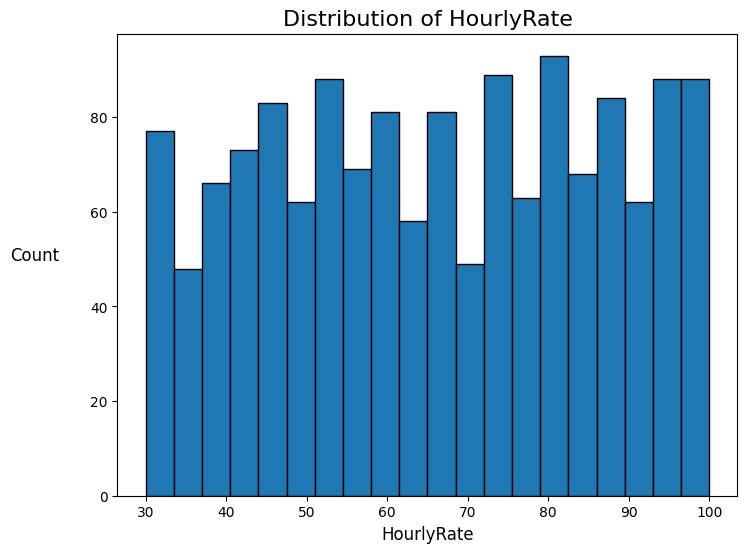

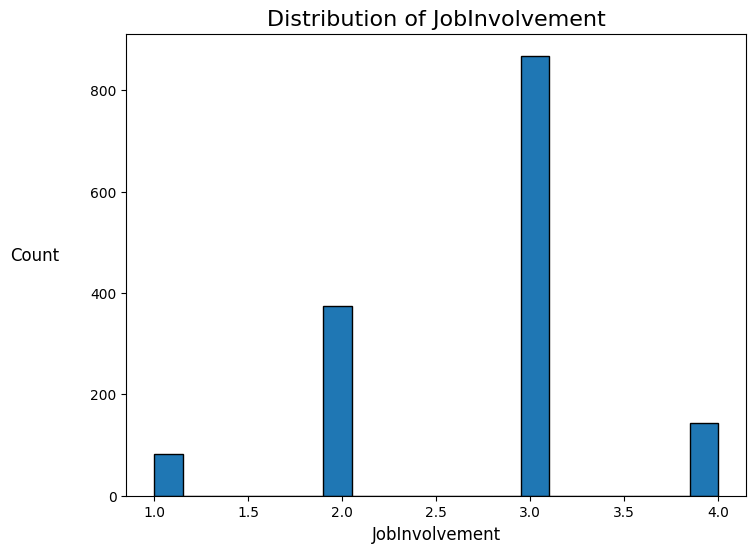

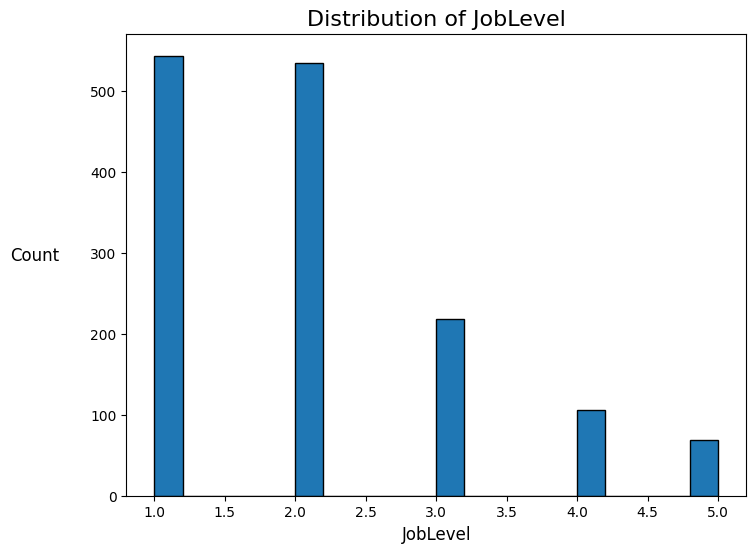

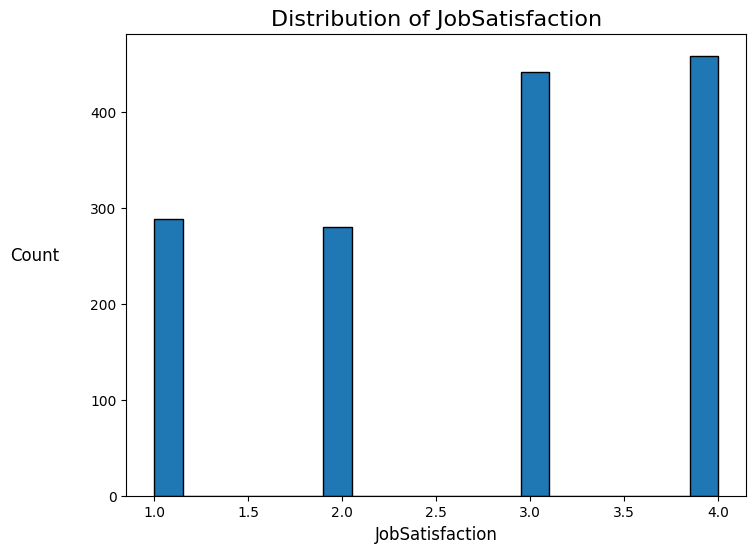

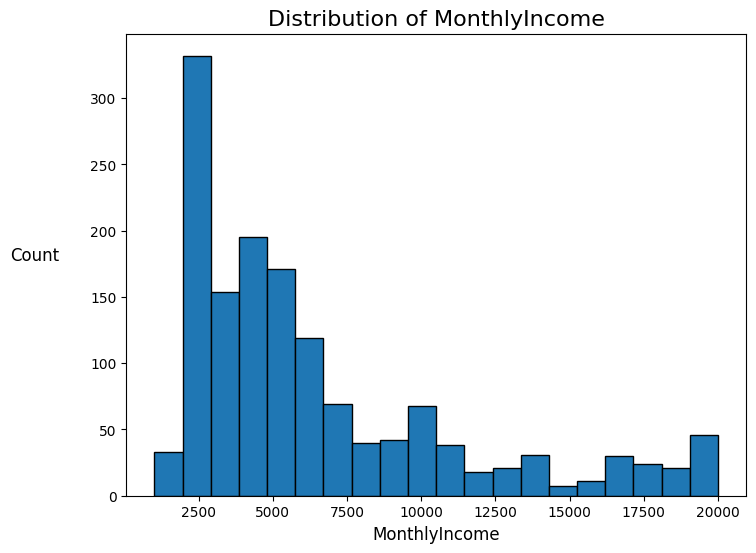

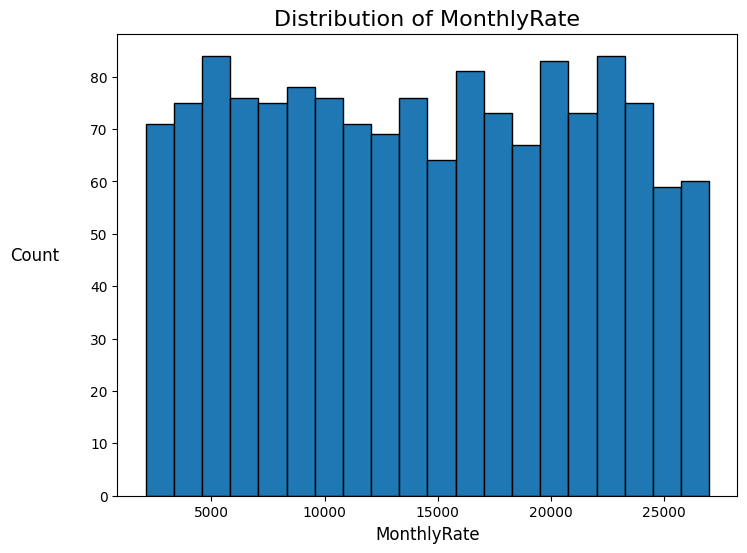

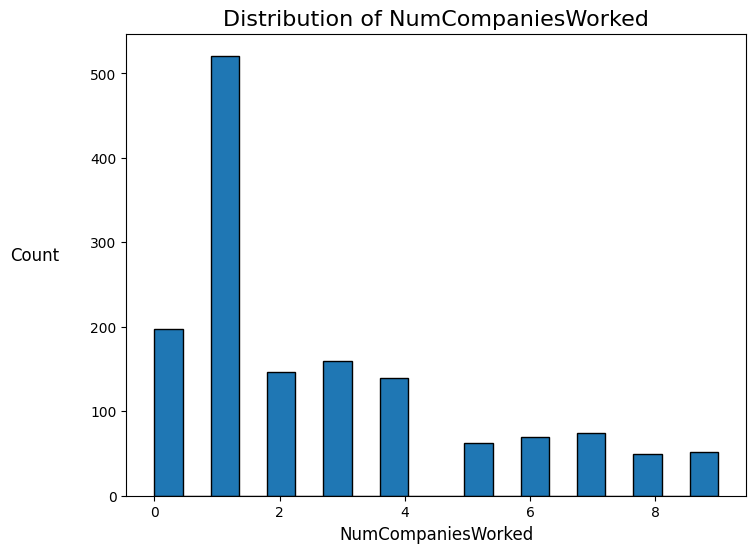

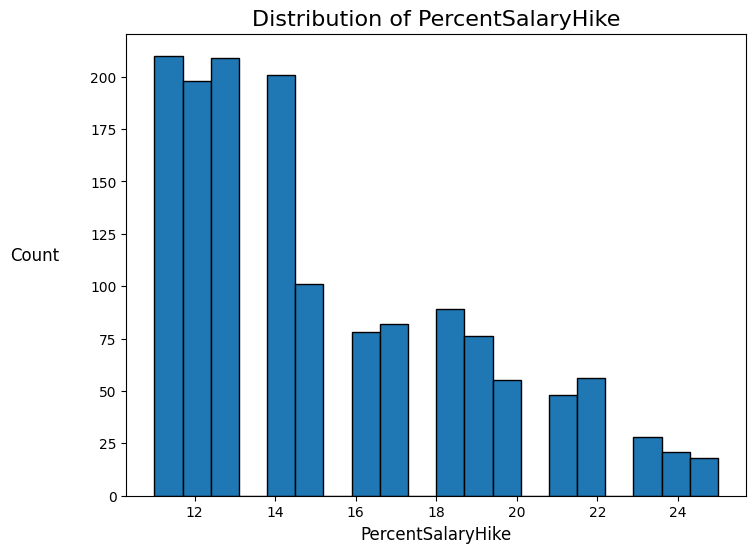

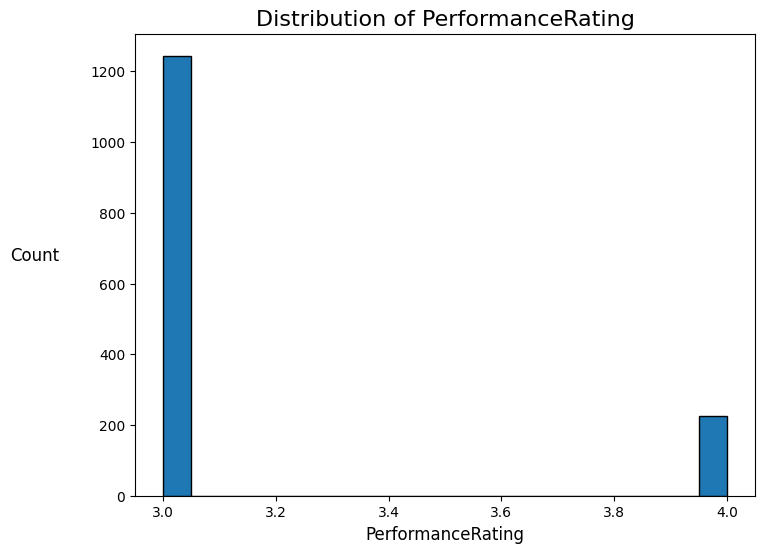

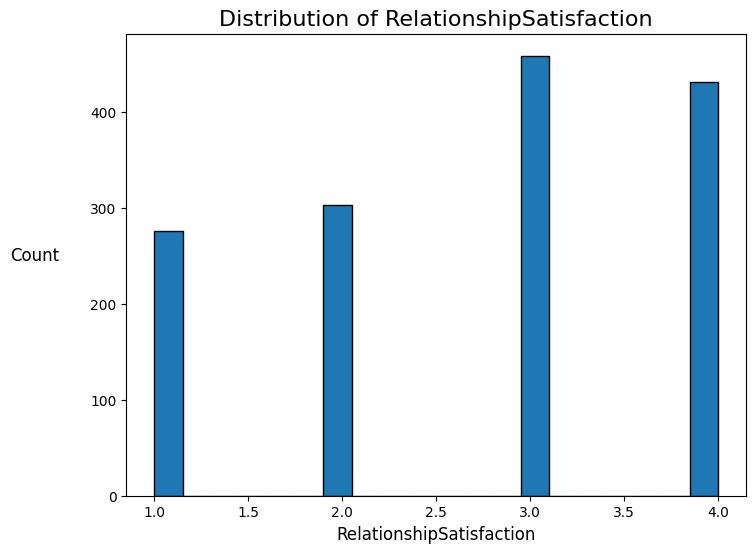

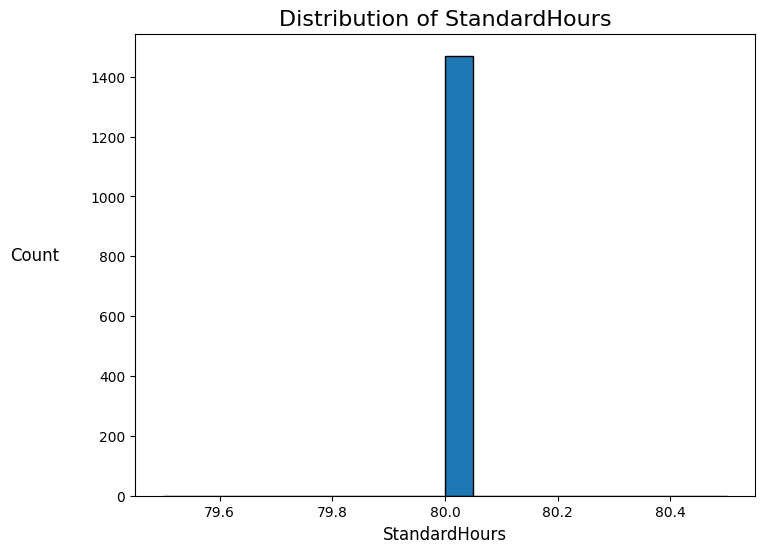

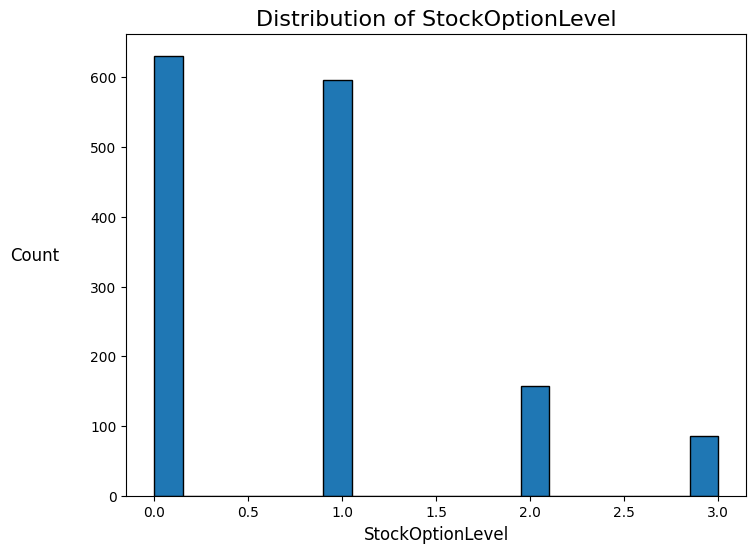

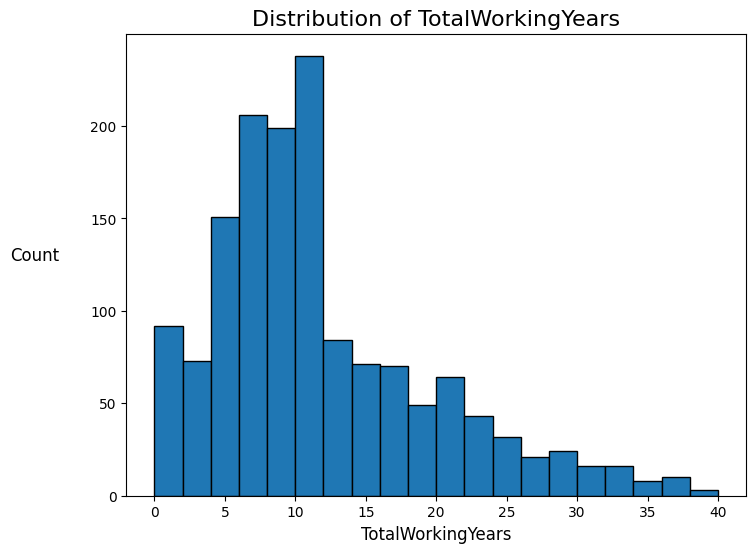

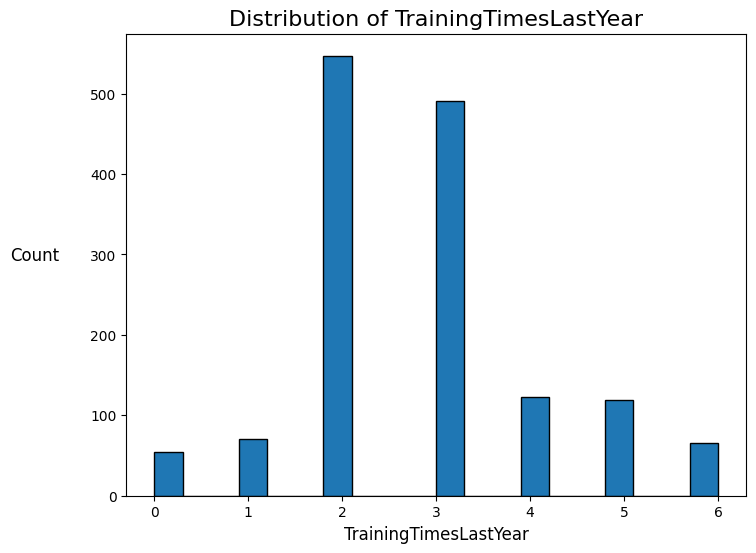

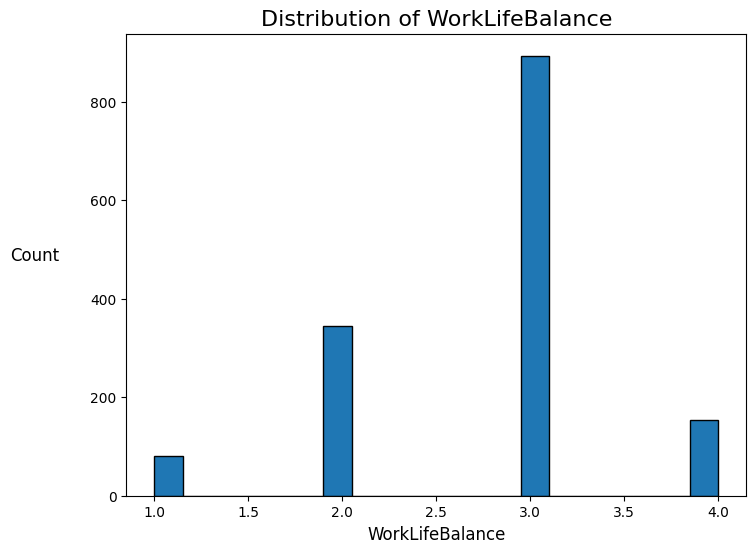

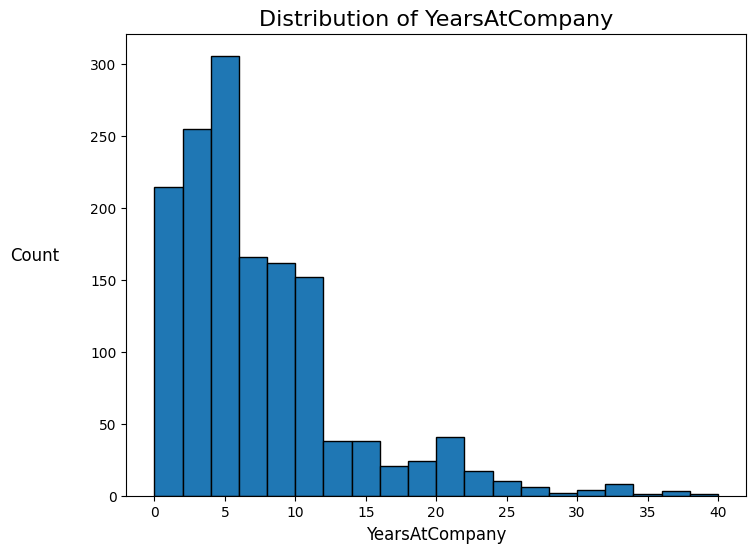

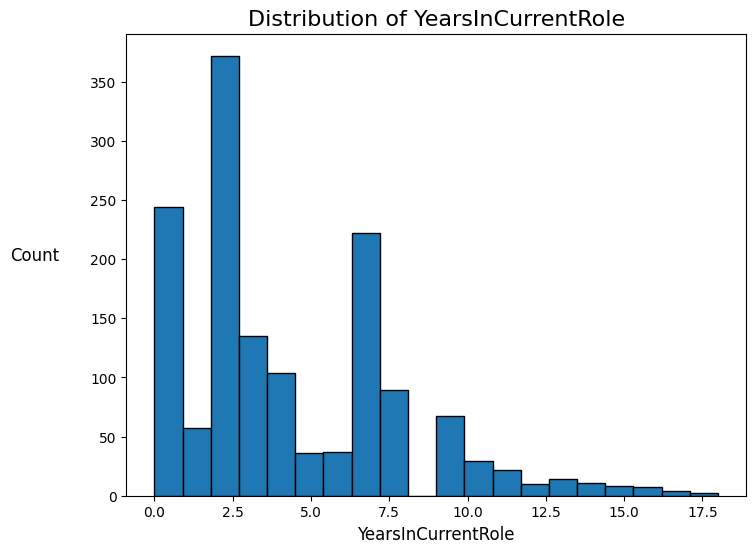

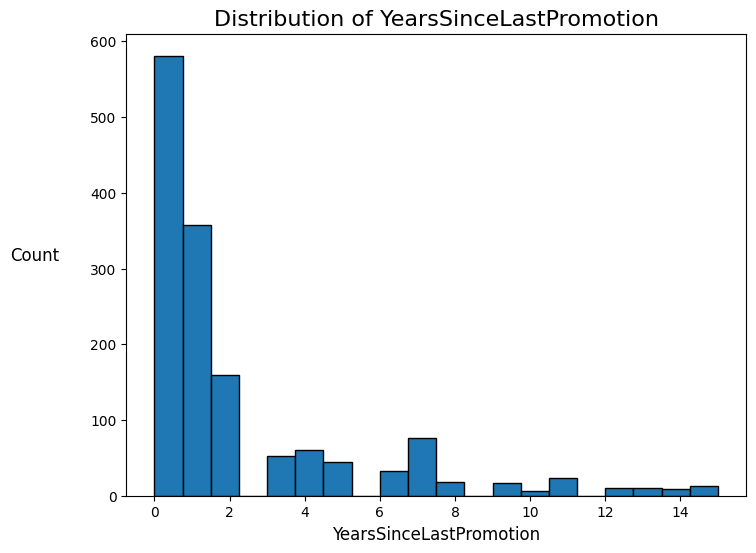

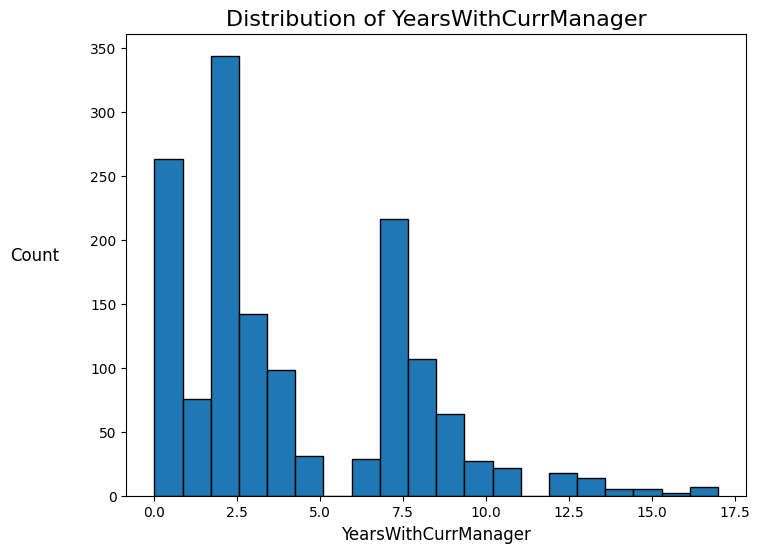

In [37]:

# Histogram of numerical variables
for column in numeric_data.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(data[column], edgecolor='black', bins=20)  # You can adjust the number of bins as needed
    plt.title(f'Distribution of {column}', fontsize=16)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12, rotation=0, labelpad=40)
    plt.show()


**Correlation Matrix**

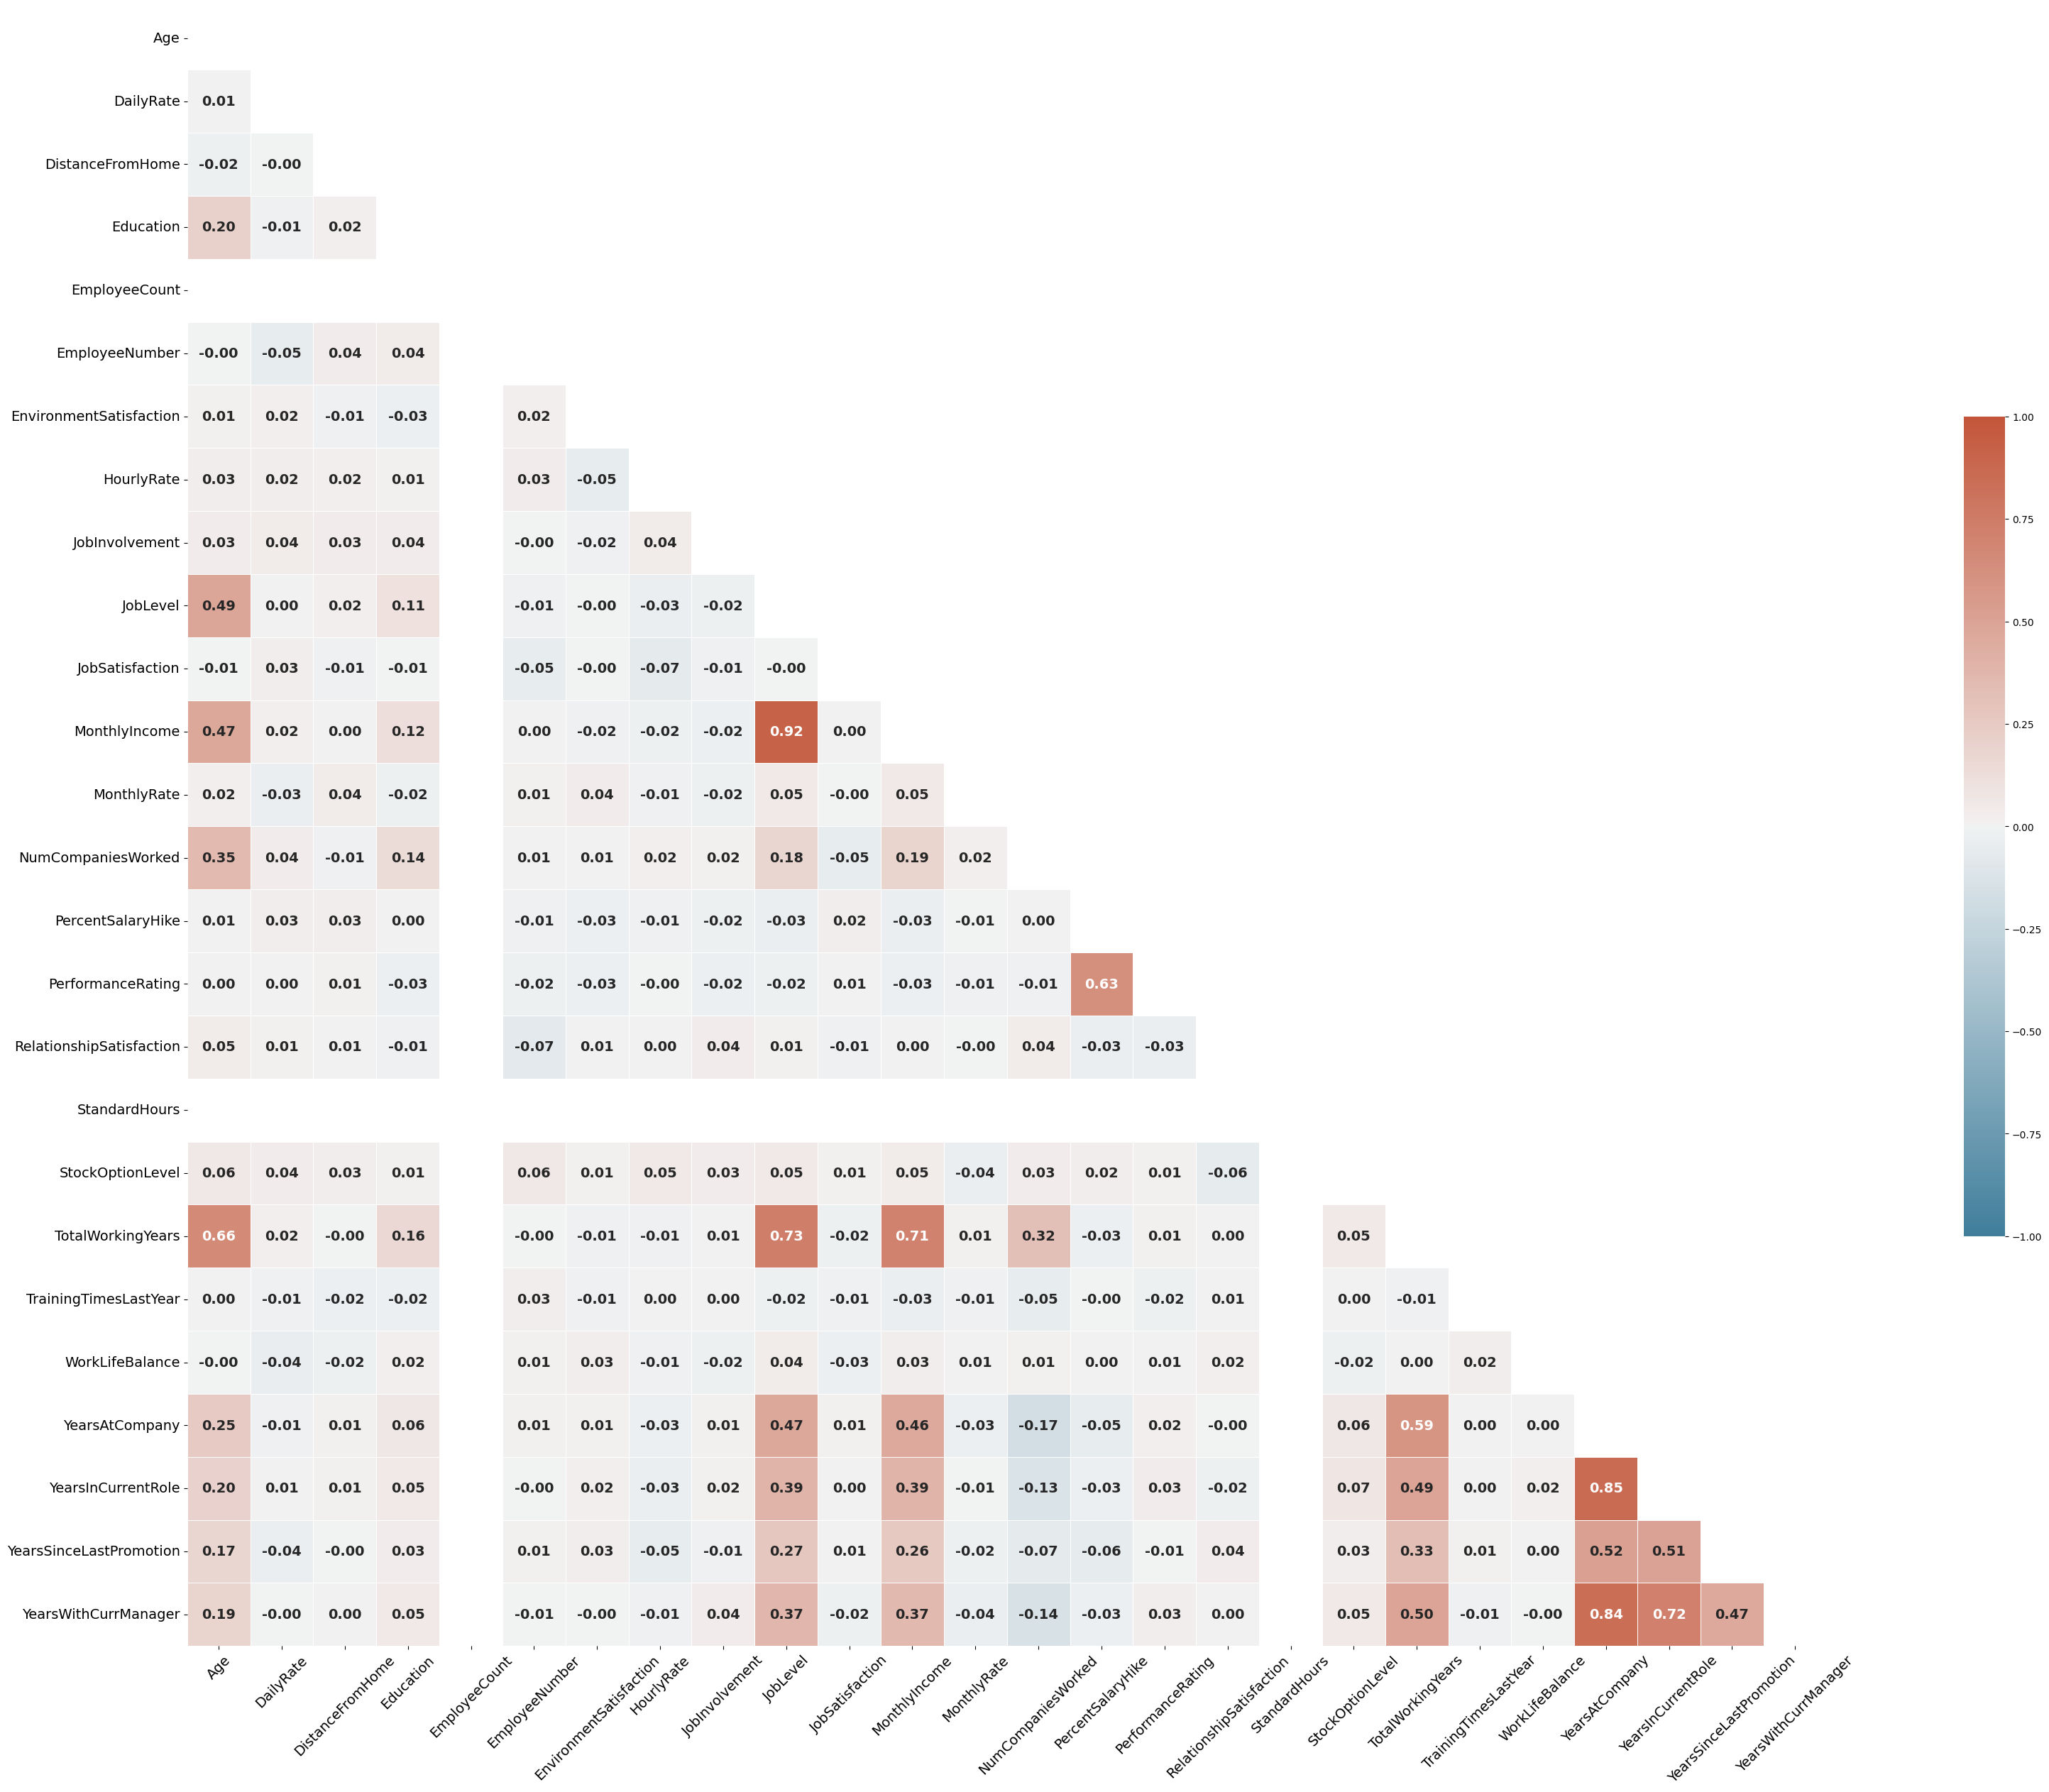

In [38]:

df_corr = numeric_data.corr(method = 'spearman')

mask = np.triu(np.ones_like(df_corr, dtype=bool))

f, ax = plt.subplots(figsize=(50, 30))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(df_corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, annot=True, fmt='0.2f', linewidths=.5, cbar_kws={"shrink": .5}, annot_kws={"fontweight": "bold", "fontsize": "14"})

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

plt.show()

    
<div class="alert alert-block alert-success">
<a id='scrub'>
<font color = '#006400'> 
    
### 4. Model </model>
</a> 

    
<div class="alert alert-block alert-success">
<a id='scrub'>
<font color = '#006400'> 
    
### 5. Interpret </int>
</a> 